In [99]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle
from PIL import Image
from tensorflow.keras.models import load_model

In [100]:
# Function to load an image, resize to 96x96, convert to gray scale and save in desired path

def load_process_save_image(filename: str,
                       target_size: tuple=(48, 48),
                       dir_path: str='./../data/raw/new_images/',
                       output_path: str='./../data/cleaned/new_images/'):
    '''
    - Takes an image (filename) from dir_path
    - Loads it into the notebook
    - Resizes to 96x96 to fit with the rest of the data
    - Transforms into grayscale
    - Saves the transformed image in output_path
    '''
    # Create output_path if it does not exist
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
        img_path = os.path.join(dir_path, filename)
        img = Image.open(img_path)

        # Resize image to 48x48
        img_resized = img.resize(target_size)

        # Convert image to grayscale
        img_grayscale = img_resized.convert('L')

        # Save image in output_path
        output_filename = os.path.join(output_path, filename)
        img_grayscale.save(output_filename)

    print(f'{filename} image processed')


In [101]:
# Applying function to  image

image_name = 'xdd.png'

load_process_save_image(image_name)

xdd.png image processed


In [102]:
# Function to convert the image into an array with pixel values

def image_to_array(filename: str,
                   dir_path: str='./../data/cleaned/new_images/') -> np.array:
    '''
    Converts image file into pixel values as a numpy array.
    Each element of the array equals to the value of a pixel, from top left to bottom right of the image.
    '''
    filepath = os.path.join(dir_path, filename)
    
    img = Image.open(filepath)

    image_data = np.array(img)

    image_data_flattened = image_data.ravel()

    return image_data_flattened

In [103]:
# Applying previous function

image_array = image_to_array(image_name)
image_array

array([ 57,  59,  64, ..., 117, 107,  86], dtype=uint8)

In [104]:
# Function to load a pickle scaler

# def load_pickle_scaler(scaler_filename: str, dir_path_scalers: str=r'C:\Users\Juan\Documents\Ironhack\Week_9\ih-final-project\scalers'):
#     '''
#     Loads a scaler saved as a .pkl file.
#     '''
#     scaler_path = os.path.join(dir_path_scalers, scaler_filename)
    
#     with open (scaler_path, 'rb') as file:
#         scaler = pickle.load(file)
    
#     return scaler

In [105]:
# Loading pkl scaler and scaling new image data

# scaler = load_pickle_scaler('minmaxscaler.pkl')

# juan_happy_array_reshaped = juan_happy_array.reshape(1, -1)

# juan_happy_array_scaled = scaler.transform(juan_happy_array_reshaped)

# juan_happy_array_reshaped_model = juan_happy_array_scaled.reshape((-1, 96, 96, 1))

# juan_happy_array_reshaped_model.shape

In [106]:
def normalize(value):
    return value/255

In [107]:
# Normalizing and reshaping image data

image_array_normalized = normalize(image_array)

image_array_reshaped = image_array_normalized.reshape((-1, 48, 48, 1))

In [108]:
# Function to load a HDF5 model

def load_h5_model(model_filename: str, dir_path_models: str=r'C:\Users\Juan\Documents\Ironhack\Week_9\ih-final-project\models'):
    '''
    Loads a scaler saved as a HDF5 file.
    '''
    model_path = os.path.join(dir_path_models, model_filename)
    
    model = load_model(model_path)
    
    return model

In [109]:
labels = ['anger', 'contempt', 'disgust', 'fear', 'happiness', 'neutral', 'sadness', 'surprise']

In [110]:
# Getting predicted label for new data

model_conv = load_h5_model('model1.h5')

image_array_pred = model_conv.predict(image_array_reshaped)

label_pred = np.argmax(image_array_pred)

emotion = labels[label_pred]

emotion

1/1 [==============================] - 0s 80ms/step


'happiness'

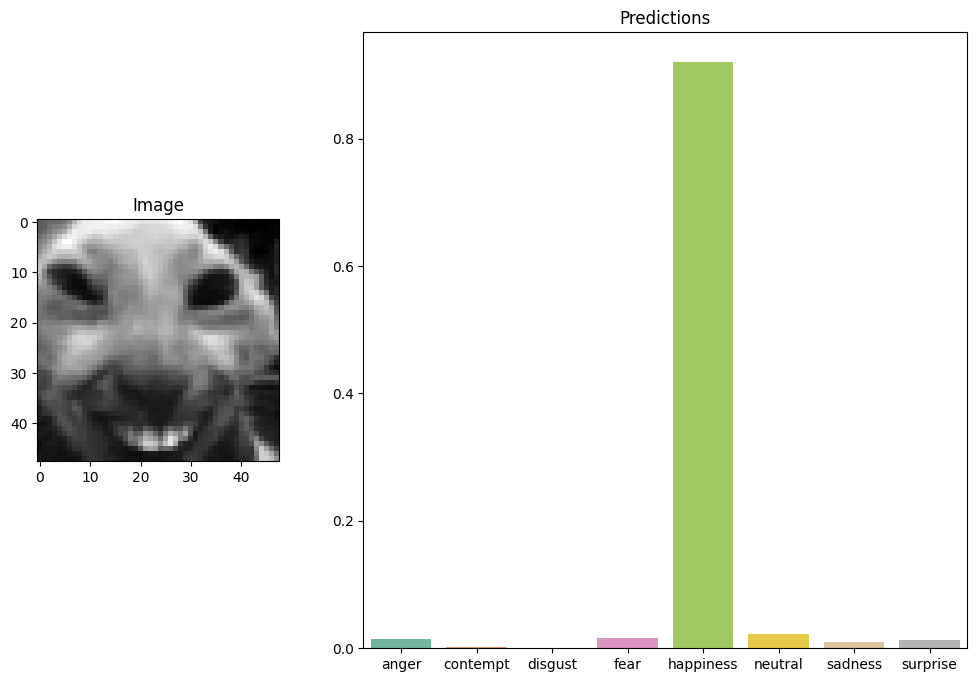

In [132]:
images_dir = './../data/cleaned/new_images/'
image_filepath = os.path.join(images_dir, image_name)
image_to_plot = Image.open(image_filepath)

fig, axes = plt.subplots(1, 2, figsize=(12, 8), gridspec_kw={'width_ratios': [2, 5]})

axes[0].imshow(image_to_plot, cmap='gray')
axes[0].set_title('Image')

sns.barplot(x=labels, y=image_array_pred[0], hue=labels, palette='Set2', ax=axes[1])
axes[1].set_title('Predictions')
plt.show()